In [132]:
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [5]:
# for Folium
ldf=pd.read_pickle('pickle_w_LongLat_noNaN.pkl')
# for general analysis
df=pd.read_pickle('Cleaned_indeed.pkl')
#df.fillna('Not Sepcified',inplace=True)


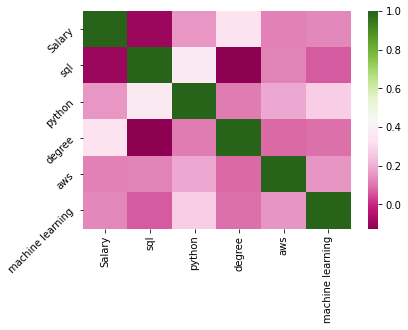

In [7]:
chart=sns.heatmap(df[['Salary','sql','python','degree','aws','machine learning']].corr(),cmap='PiYG')
chart.set_yticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [8]:
pd.pivot_table(df,values='Salary',index=['Title'],columns=['Degree'])

Degree,Bachelor,Master's,PHD
Title,,,
AI,109000.000000,NaN,NaN
analyst,91864.000000,75000.000000,106000.000000
data engineer,130649.500000,NaN,NaN
data scientist,106699.602083,117795.788571,153067.857143
mle,73150.000000,112825.500000,NaN


In [80]:
pd.pivot_table(df,values='Salary',columns=['Degree'],index=['state'])

Degree,Bachelor,Master's,PHD
state,,,
AZ,115000.000000,NaN,NaN
CA,104275.285714,137861.666667,175183.333333
CO,92488.888889,130000.000000,NaN
CT,NaN,153860.000000,127700.000000
DC,121325.000000,NaN,NaN
DE,NaN,90000.000000,NaN
FL,90977.833333,NaN,NaN
GA,95450.000000,60881.600000,NaN
IA,100000.000000,NaN,NaN


In [10]:
pd.pivot_table(df,values='Salary',columns=['Degree'],index=['Remote'])

Degree,Bachelor,Master's,PHD
Remote,,,
False,97172.242105,123660.031579,147425.000000
True,119380.775000,111180.136364,143309.090909


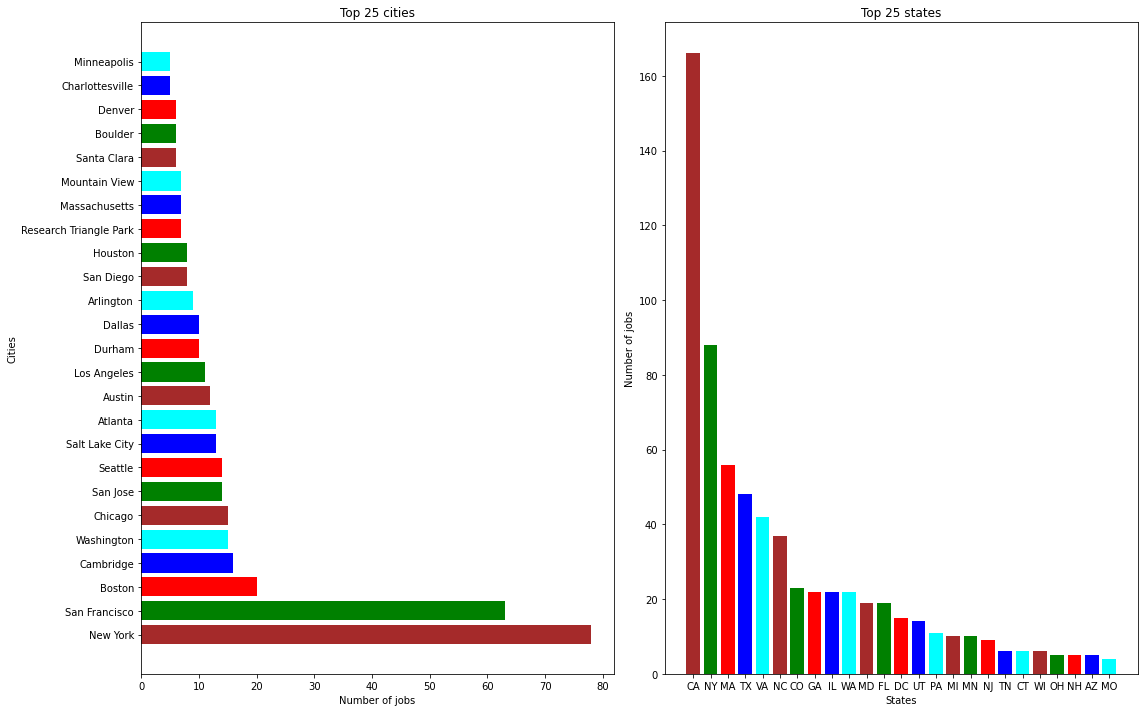

In [11]:
# creating a seperate data frame for the city and state without nan values so I can plot them

# creating a seperate data frame for the city without nan values so I can plot it
city=pd.DataFrame(df.city.value_counts())
state=pd.DataFrame(df.state.value_counts())
# eliminating Nan values from the 0 index since it has the highest numbers
city=city.iloc[1:,:]

# eliminating Nan values from state
state.drop(['nan'],axis=0,inplace=True)

# plots of city and state
fig,ax=plt.subplots(1,2,figsize=(16,10))
ax[0].barh(city.head(25).index,city.city.head(25).values,color=['brown', 'green', 'red', 'blue', 'cyan']
)
ax[0].set_xlabel('Number of jobs')
ax[0].set_ylabel('Cities')
ax[0].set_title('Top 25 cities')



ax[1].bar(state.head(25).index,state.state.head(25).values,color=['brown', 'green', 'red', 'blue', 'cyan'])
ax[1].set_ylabel('Number of jobs')
ax[1].set_xlabel('States')
ax[1].set_title('Top 25 states')

plt.tight_layout()
plt.show()

### Most demanding skills(like Python, AWS, SQL ...)



In [104]:
skill_df=df.iloc[:,12:]
lst=[]
for i in skill_df.columns:
    skill=skill_df[i].value_counts()
    lst.append(skill)
sk=pd.DataFrame(lst)
# sorting the dataframe by True so we can see the most demanding skills
sk.sort_values(by=True,ascending=False,inplace=True)
# dropping degree from skills
sk=sk[:22]
sk.index=['python', 'machine learning', 'sql', 'statistics', 'excel', 
       'aws', 'git', 'R', 'tableau', 'spark', 'deep learning', 'sas',
       'tensorflow', 'pandas', 'nlp', 'hadoop', 'power bi', 'sagemaker',
       'github', 'text mining', 'restful', 'pythorch']

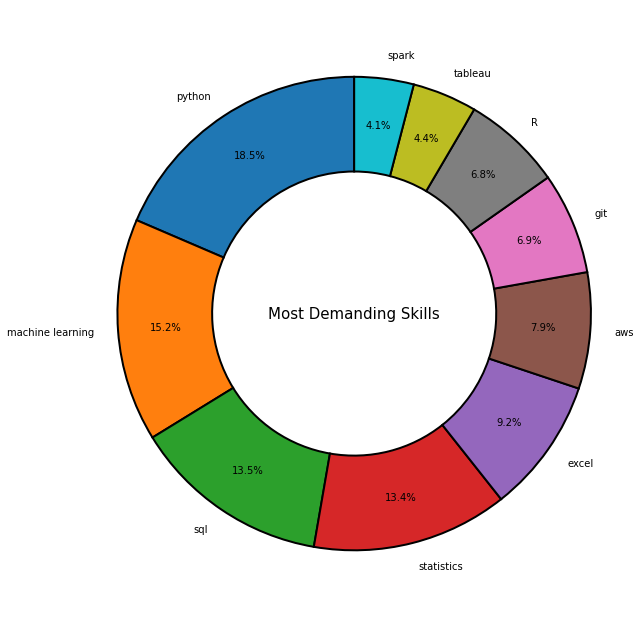

In [102]:
fig,ax=plt.subplots(figsize=(9,9))
ax.pie(sk[True].head(10).values,labels=sk[True].head(10).index,
          autopct=lambda x:'{:.1f}%'.format(x),
          wedgeprops={'width':0.4,
                 'edgecolor':'black',
                 'linewidth':2},
      startangle=90,
      pctdistance=0.8)
ax.axis('equal')
plt.text(0,0,
        'Most Demanding Skills',
        ha='center',
        va='center',
        fontsize=15)

plt.tight_layout()
plt.show()

### Remote

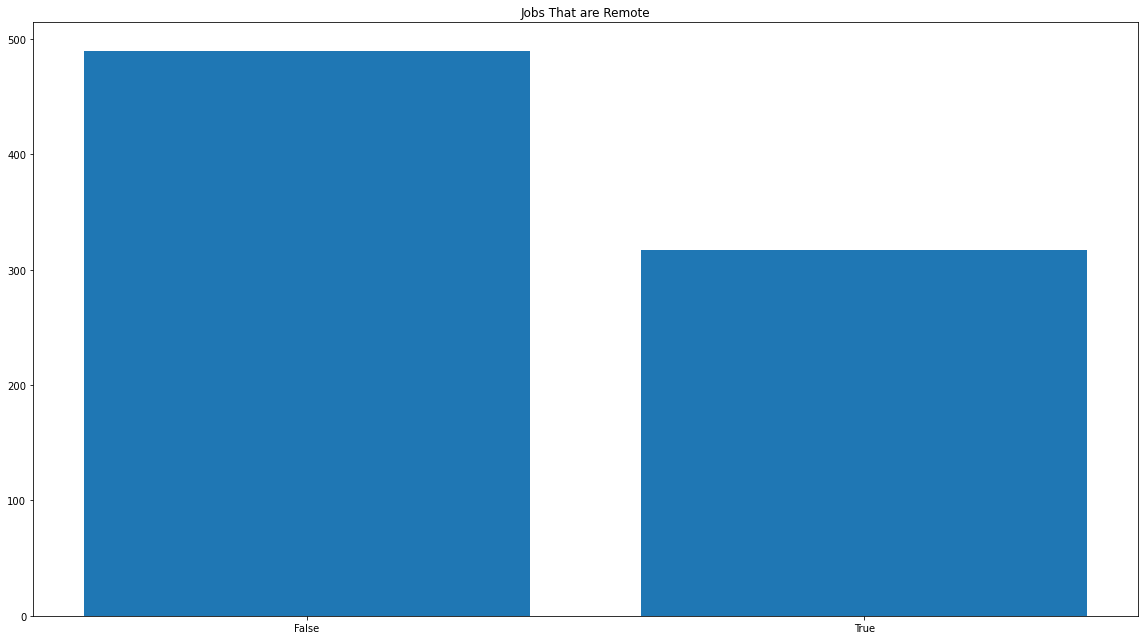

In [87]:
remote=pd.DataFrame(df.Remote.value_counts())
remote.index = remote.index.map(str)
fig,ax=plt.subplots(figsize=(16,9))
ax.bar(remote.index,remote.Remote)
ax.set_title('Jobs That are Remote')
plt.tight_layout()
plt.show()

### Degree

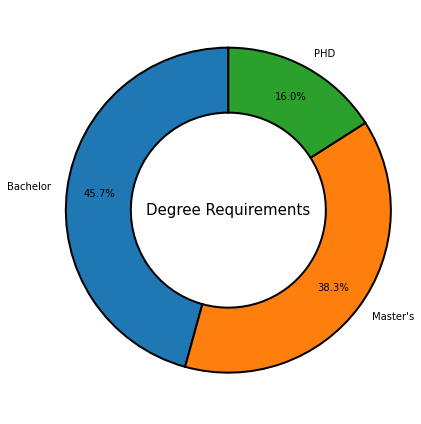

In [84]:
fig,ax=plt.subplots(figsize=(6,6))
ax.pie(df['Degree'].value_counts().values,labels=df['Degree'].value_counts().index,
       autopct=lambda x:'{:.1f}%'.format(x),
      wedgeprops={'width':0.4,
                 'edgecolor':'black',
                 'linewidth':2},
      startangle=90,
      pctdistance=0.8)
ax.axis('equal')
plt.text(0,0,
        'Degree Requirements',
        ha='center',
        va='center',
        fontsize=15)
plt.tight_layout()
plt.show()

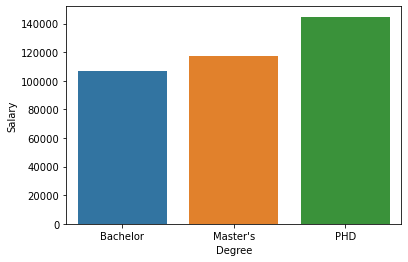

In [86]:
pool=df.groupby('Degree')[['Salary']].mean()
pool.reset_index(inplace=True)
sns.barplot(x=pool['Degree'],y=pool['Salary'])
plt.show()

# NLP and wordcloud

In [116]:
def contraction(text):
    t = text

    
    expand = []    
    for words in t.split():
      
      expand.append(contractions.fix(words))   
    expanded = ' '.join(expand)    
    return expanded

In [117]:
def stop_word(text):

    example = text

    stop = set(stopwords.words('english'))

    word = word_tokenize(example)

    filtered = [s for s in word if not s.lower() in stop]

    filtered = []

    for s in word:
        if s not in stop:
            filtered.append(s)


    expanded = ' '.join(filtered)    
    return expanded

In [118]:
def lemmatize(text):
    wnl = WordNetLemmatizer()
    string = text
 

    lst = nltk.word_tokenize(string)
    
    

    lemmatized = ' '.join([wnl.lemmatize(words) for words in lst])

    return lemmatized  

In [125]:
#expanding contractions
df['job_summary']=df['job_summary'].apply(lambda x:contraction(x))

#stop words removal
df['job_summary']=df['job_summary'].apply(lambda x:stop_word(x))

#lemmatization
df['job_summary']=df['job_summary'].apply(lambda x:lemmatize(x))


In [128]:
all_text=df['job_summary'].value_counts().index.to_list()

In [129]:
unique_string=(" ").join(all_text)

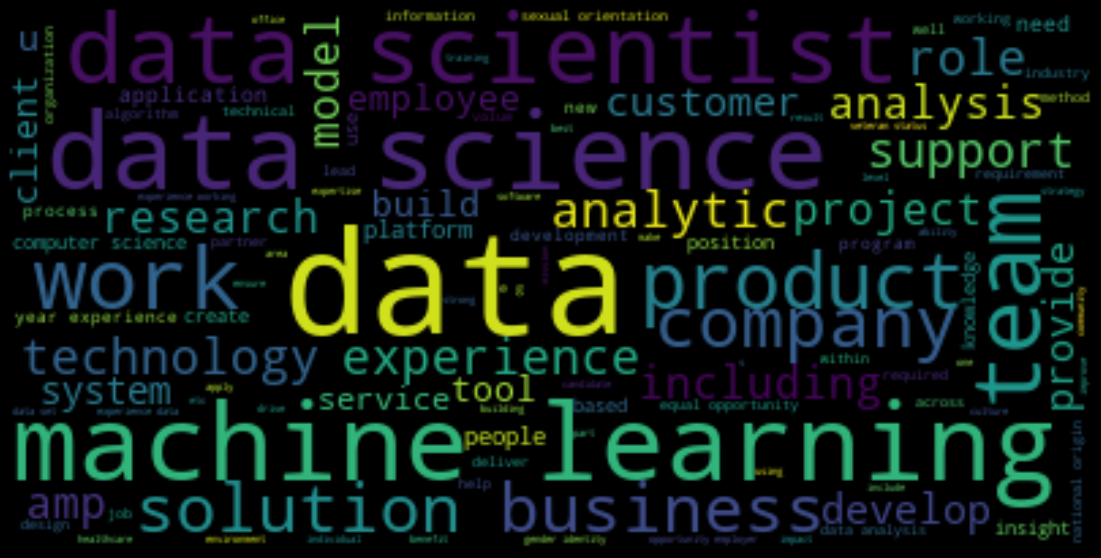

In [134]:
wordcloud = WordCloud().generate(unique_string)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

### Folium

In [136]:
# Visualizing the job market with folium 
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Draggable Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Salary and Degree information not available</li>
    <li><span style='background:black;opacity:0.7;'></span>Degree information not available</li>
    <li><span style='background:blue;opacity:0.7;'></span>Salary information not available</li>
    <li><span style='background:green;opacity:0.7;'></span>Salary and Degree information available</li>


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""


s= folium.Map(location=[40, -100], zoom_start=5,tiles="OpenStreetMap")
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(s)

for i in range(len(ldf)):
    title=ldf.loc[i].Title
    company=ldf.loc[i].Company
    city=ldf.loc[i].city
    degree=ldf.loc[i].Degree
    salary=ldf.loc[i].Salary
    pop=f"Title: \n {title} <br>"f"Company: \n {company} <br>"f"City: \n {city} <br>"f"Degree: \n {degree} <br>"f"Salary: ${salary} <br>"
    if ldf.loc[i].Salary=='Not Specified' and ldf.loc[i].Degree=='Not Specified':
        color= 'red'
    elif ldf.loc[i].Degree=='Not Specified':
        color='black'
    elif ldf.loc[i].Salary=='Not Specified':
        color= 'blue'
    else:
        color= 'green'
    
    
    folium.Circle(radius=50,location=[ldf.loc[i]['latitude'],ldf.loc[i]['longitude']],color=color,tooltip='Click for more info',
                                 popup=folium.Popup(pop,max_width=200,min_width=200),fill=True).add_to(s)
macro = MacroElement()
macro._template = Template(template)

s.get_root().add_child(macro)  
s.save('allJobs.html')
